In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse.construct import random
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
from sklearn.model_selection import StratifiedKFold
from random import *    
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
#Mutual information
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectPercentile
from sklearn.svm import NuSVC

df = pd.read_csv("kasMasterNew.csv",sep=';')
#print("data shape: ", df.shape)
#print("data head: ", df.head)

first_column = df.columns[0]
df = df.drop([first_column], axis=1)
feature_labels = df.columns
last = df.iloc[:,-1]
df = df.iloc[:, :-1]

X = df
y = np.ravel(last.to_numpy()
            )
#print("y: ", y)
#print("data X: ", X)
#print("features: ",feature_labels[:-1])

#X_t = df.to_numpy()
#yy = np.ravel(last.to_numpy())

X1, X_testEnd, y1, y_testEnd = train_test_split(X, y, test_size = 0.1)


#run mutual information til 60 % reduction
#sel = SelectPercentile(mutual_info_classif, percentile=20).fit(X1, y1)
#model = list()    
#X_t = sel.transform(X1)
X_t = X1.to_numpy()
from sklearn.svm import NuSVC
model = list()
features = list()

for x in range(1,2):
    folds = 6
    skf = StratifiedKFold(n_splits=folds, random_state=randint(1, 20000), shuffle=True, )
    skf.get_n_splits(X_t, y1)
    acc_score = []
    for train_index, test_index in skf.split(X_t, y1):
        X_train, X_test = X_t[train_index], X_t[test_index]
        y_train, y_test = y1[train_index], y1[test_index]
        
        scale = StandardScaler()
        scaler = scale.fit(X_train)
        
        X_train1 = scaler.transform(X_train)
        X_test1 = scaler.transform(X_test)
        
        estimator = SVC(kernel="linear")
        #estimator = SVC(kernel="linear", decision_function_shape='ovo', cache_size=200, class_weight={'Basal':1, 'Her2':1, 'LumA':1, 'LumB':1.3, 'Normal':1}, random_state=randint(1, 10000))
        selector = RFE(estimator, n_features_to_select=50, step=100)
        selector = selector.fit(X_train1, y_train)

        print("Support: ", selector.support_)
        print("Ranking", selector.ranking_)

        #from imblearn.over_sampling import SMOTE
        #oversample = SMOTE()
        X_test2, y_test2 = X_test1, y_test
        #X_test2, y_test2 = oversample.fit_resample(X_test1, y_test)

        X_train11 = pd.DataFrame(X_train1)
        X_test11 = pd.DataFrame(X_test2)

        f = selector.get_support(1)

        X_train = X_train11[X_train11.columns[f]]
        X_test = X_test11[X_test11.columns[f]]

        clf = SVC(kernel="linear", C = 0.1,decision_function_shape='ovo', class_weight = None, random_state=42)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        
        #print('Accuracy on test set: ')
        print(accuracy_score(y_test2, y_pred))
        print(confusion_matrix(y_test2,y_pred))
        print(classification_report(y_test2,y_pred))
        acc_score.append(accuracy_score(y_test2, y_pred))
        
        features.append(df[df.columns[f]])
    model.append(acc_score)
    print("Average score:", np.mean(acc_score))
    #model.append(acc_score)             
print("Model:", model)

Support:  [False False False ... False False False]
Ranking [ 21  15  43 ... 141  92 149]
0.8662790697674418
[[24  0  1  0  2]
 [ 1 12  0  0  0]
 [ 0  2 73  5  0]
 [ 0  0  8 22  0]
 [ 1  0  3  0 18]]
              precision    recall  f1-score   support

       Basal       0.92      0.89      0.91        27
        Her2       0.86      0.92      0.89        13
        LumA       0.86      0.91      0.88        80
        LumB       0.81      0.73      0.77        30
      Normal       0.90      0.82      0.86        22

    accuracy                           0.87       172
   macro avg       0.87      0.86      0.86       172
weighted avg       0.87      0.87      0.87       172

Support:  [False False False ... False False False]
Ranking [ 22  44  55 ... 110 144  86]
0.8604651162790697
[[26  0  0  0  1]
 [ 0  9  1  1  1]
 [ 0  0 73  4  3]
 [ 0  3  7 20  0]
 [ 0  0  3  0 20]]
              precision    recall  f1-score   support

       Basal       1.00      0.96      0.98        27
  

18
22
29
49
71
78
81
93
123
139
155
160
171
178
225
233
248
271
277
296
317
320
321
342
355
366
379
413
424
429
467
482
499
509
530
640
753
760
813
905
910
911
948
996
1022
1031
1078
1092
1140
1164
1172
1180
1184
1189
1224
1275
1348
1378
1396
1419
1424
1425
1465
1491
1497
1499
1530
1550
1603
1668
1717
1852
2020
2064
2066
2154
2198
2315
2391
2547
2550
2644
2655
2719
2821
2964
2999
3008
3020
3040
3067
3080
3100
3173
3199
3204
3362
3370
3425
3657
3717
3777
3818
3820
3899
3989
4143
4184
4305
4328
4334
4369
4611
4724
4822
4967
5048
5082
5242
5300
5354
5362
5538
5699
5867
5907
5998
6319
6327
6429
6615
6673
6839
6899
6903
6927
7014
7360
7587
7693
7903
8007
8058
8145
8180
8217
8320
8492
8642
8852
8879
8933
9015
9162
9173
9528
9628
9750
9905
9937
9946
9958
10010
10241
10484
10498
10538
10872
11279
11388
11799
11945
12450
12463
12747
12941
13279
13380
14006
14170
14261
14315
14403
14817
15235
15395
15485
15553
16260
16404
16630
16807
17243
17291
Top doules features names:  ('LCN1', 'NPFFR1', 'CC

<ipython-input-89-f0a31b66f3bf>:94: UserWarning: FixedFormatter should only be used together with FixedLocator
  sns_plot.set_xticklabels(labels= np.unique(dd).tolist(), rotation=90, fontsize=5)


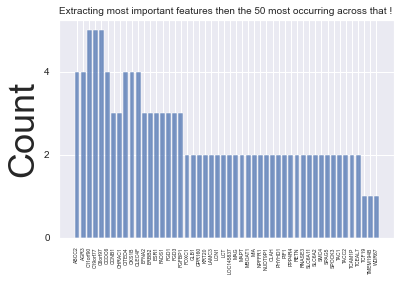

In [89]:
uniquelist = list()
allfeatures = list()
merged = list()
for i in features:
    allfeatures.append(i.columns)
for subset in allfeatures:
    for word in subset:
        merged.append(word)
    
unique = []
double = []
triple = []
final = []
for number in merged:   
    if number in unique:
        if number in double:
            final.append(number)
        else:
            double.append(number)       
    else:
        unique.append(number)
        
from numpy.core.fromnumeric import sort

#print(unique)
#print(final)
finish = final + double + double
#print(sort(finish))

morethan22 = []
morethan2 = 0
twoOrLess = 0
twoOrLesss = []
for number2 in np.unique(finish).tolist():   
    if (number2 in np.unique(final).tolist()):
        morethan22.append(number2)
        morethan2 = morethan2 + 1
    else:
        twoOrLess = twoOrLess + 1
        twoOrLesss.append(number2)

oneOc = []
for num in unique:
    if num not in (twoOrLesss or morethan22):
        oneOc.append(num)
        
         
l = list()
indexNames = list()
newImp = list()

            
def f_importances(coef, names, top):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))
    for ind, colum in enumerate(df.columns):
        for name in oneOc:  
            if colum == name:
                print(ind)
                #index = names.index(name)
                newImp.append(imp[ind])
                
    imp2, names2 = zip(*sorted(list(zip(newImp, oneOc))))
    print("Top doules features names: ", names2[::-1][0:top])
    print("Top doules weights: ", imp2[::-1][0:top])
    l.append(names2[::-1][0:top])

clfAll = SVC(kernel="linear", C = 0.1,decision_function_shape='ovo', class_weight = None, random_state=42)
clfAll.fit(X, y)

absCoef = abs(clfAll.coef_)
absAverageCoef = absCoef.mean(axis=0)
f_importances(absAverageCoef, feature_labels, top=(50 - (morethan2+twoOrLess)))

allFinalF = list()
more = list()

for jj in l[0]:
    allFinalF.append(jj)
    allFinalF.append(jj)

    
for ee in finish:
    if ee in final:
        more.append(ee) 


print(allFinalF)
        
dd = more + twoOrLesss + twoOrLesss + np.unique(allFinalF).tolist()

import seaborn as sns
sns_plot = sns.histplot(data=dd, shrink=.8)
sns_plot.set_xticklabels(labels= np.unique(dd).tolist(), rotation=90, fontsize=5)
sns_plot.set_title('Extracting most important features then the 50 most occurring across that ! ', fontsize=10)

plt.yticks(fontsize=10)
sns_plot.figure.savefig('features5-333366new2.png', bbox_inches='tight', dpi=500)

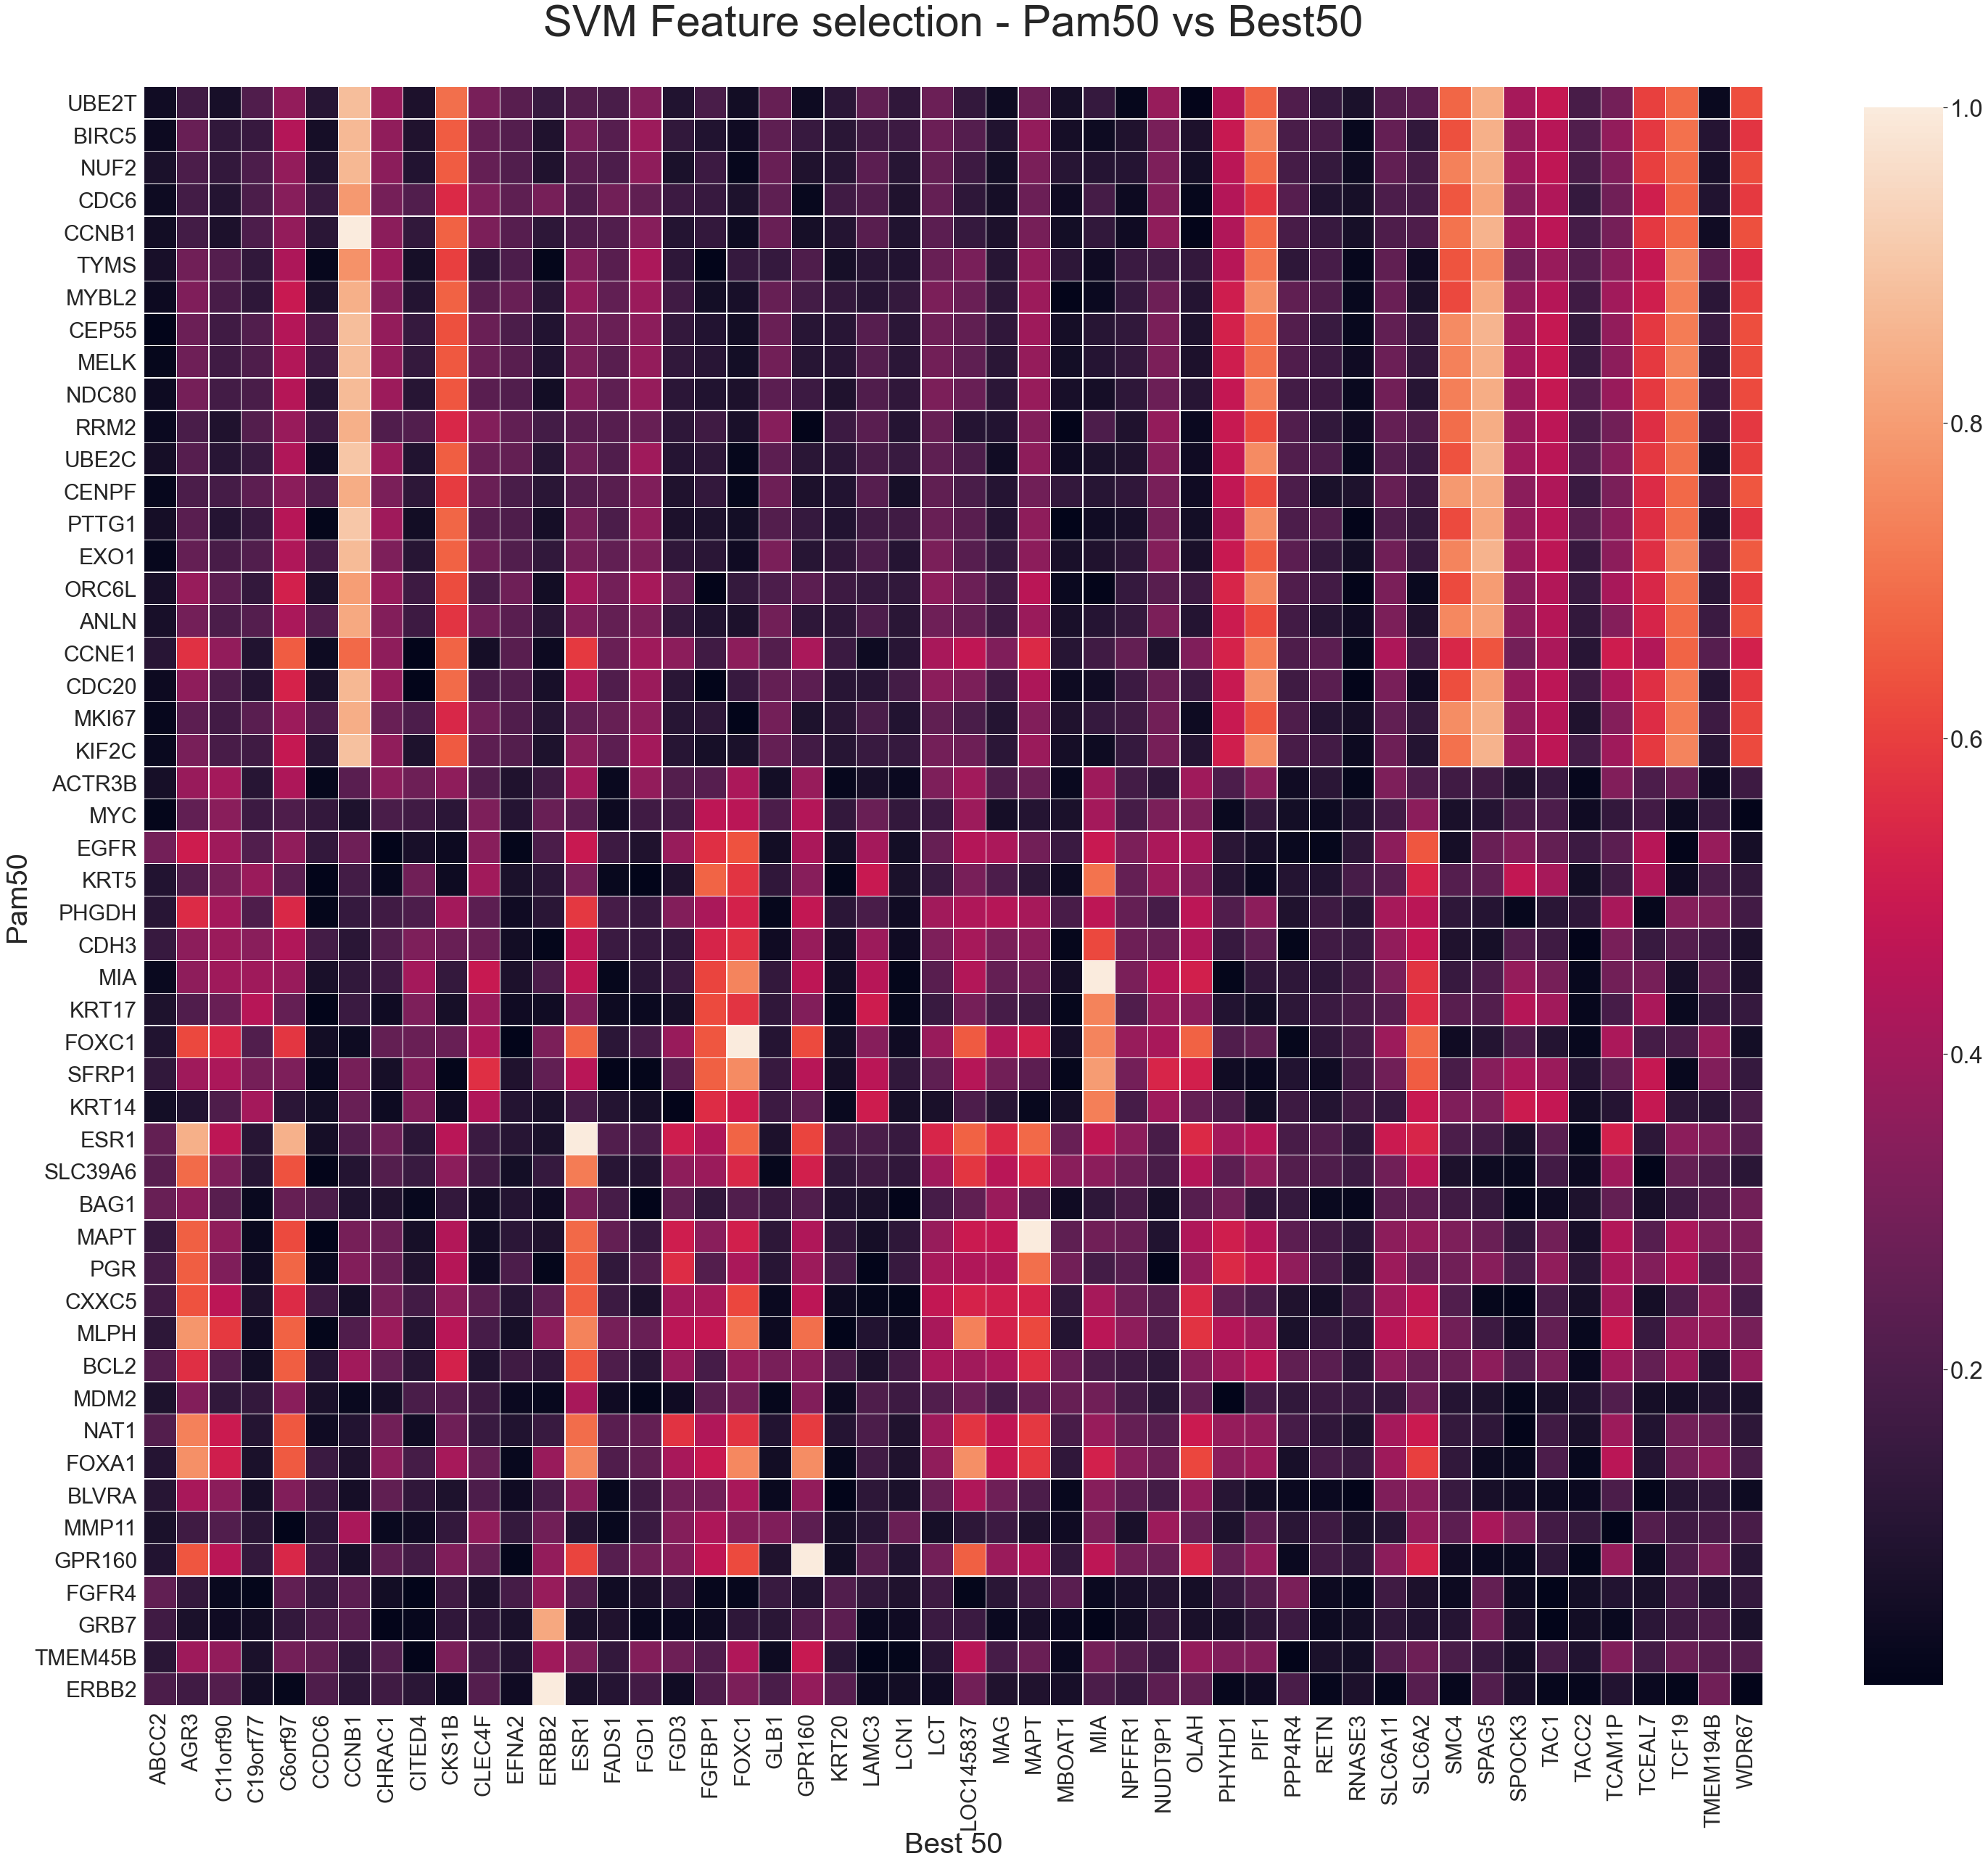

<Figure size 432x288 with 0 Axes>

In [64]:
pam50 = ['UBE2T', 'BIRC5', 'NUF2', 'CDC6', 'CCNB1', 'TYMS', 'MYBL2', 'CEP55',
       'MELK', 'NDC80', 'RRM2', 'UBE2C', 'CENPF', 'PTTG1', 'EXO1', 'ORC6L',
       'ANLN', 'CCNE1', 'CDC20', 'MKI67', 'KIF2C', 'ACTR3B', 'MYC', 'EGFR',
       'KRT5', 'PHGDH', 'CDH3', 'MIA', 'KRT17', 'FOXC1', 'SFRP1', 'KRT14',
       'ESR1', 'SLC39A6', 'BAG1', 'MAPT', 'PGR', 'CXXC5', 'MLPH', 'BCL2',
       'MDM2', 'NAT1', 'FOXA1', 'BLVRA', 'MMP11', 'GPR160', 'FGFR4', 'GRB7',
       'TMEM45B', 'ERBB2']
# not in out data set : ['SR1', 'KNTC2', 'CDCA1'] so deleted from pam 50.

best50 = df[np.unique(dd).tolist()] # of latest best features
p = df[pam50]

from numpy.random import seed
from scipy.stats import pearsonr

# seed random number generator
seed(1)
# prepare data
#best50 = best50.iloc[:, 0:2]
#p = p.iloc[:, 0:2]
ll = list()
# calculate Pearson's correlation
col = list()
for ind, colum in enumerate(best50.columns):
    #corr, _ = pearsonr(p.columns[ind], column)
    #l.appende(corr)
    for ins, column in enumerate(p.columns):
        #print(colum)
        #print(column)
        #print(p.columns[ind])
        #print(ind)
        #print(best50.columns[ins])
        #print(ins)
        corr, _ = pearsonr(p[column], best50[colum])
        #print(abs(corr))
        col.append(abs(corr))
    ll.append(col)
    col=[] 
#print(ll)  



import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

fig, ax = plt.subplots(figsize=(50, 50))
#plt.xlabel(best50.columns)
#plt.ylabel(p.columns)

#fig.title('Pearson Absolute Values', fontsize=40)

x_axis_labels = best50.columns.to_numpy() # labels for x-axis
y_axis_labels =  p.columns.to_numpy()# labels for y-axis

# create seabvorn heatmap with required labels
b = sb.heatmap(np.array(ll).T.tolist(),  xticklabels=x_axis_labels, yticklabels=y_axis_labels,
           linewidth=0.4, cbar_kws={"shrink": .8}, fmt=".2f",square=True)
b.axes.set_title("SVM Feature selection - Pam50 vs Best50\n ",fontsize=60)
b.set_xlabel("Best 50",fontsize=40)
b.set_ylabel("Pam50",fontsize=40)
b.tick_params(labelsize=30)
sb.set(font_scale=3)
plt.show()
plt.savefig('HeatMap-Pam50vsFeatureSelectionBest50-166.jpg',dpi=400)

Model: [[0.936046511627907, 0.9505813953488372, 0.9331395348837209, 0.9302325581395349, 0.9418604651162791], [0.9447674418604651, 0.9244186046511628, 0.9331395348837209, 0.9505813953488372, 0.9331395348837209], [0.9447674418604651, 0.9534883720930233, 0.9622093023255814, 0.9331395348837209, 0.9302325581395349], [0.9505813953488372, 0.9563953488372093, 0.9505813953488372, 0.9447674418604651, 0.9447674418604651], [0.9505813953488372, 0.9156976744186046, 0.9244186046511628, 0.9186046511627907, 0.938953488372093], [0.9156976744186046, 0.9447674418604651, 0.9302325581395349, 0.9244186046511628, 0.9476744186046512], [0.9476744186046512, 0.9418604651162791, 0.9331395348837209, 0.9534883720930233, 0.9505813953488372], [0.9418604651162791, 0.9505813953488372, 0.9302325581395349, 0.936046511627907, 0.9622093023255814], [0.9651162790697675, 0.9418604651162791, 0.9331395348837209, 0.9505813953488372, 0.9418604651162791], [0.9505813953488372, 0.9476744186046512, 0.9418604651162791, 0.95639534883720

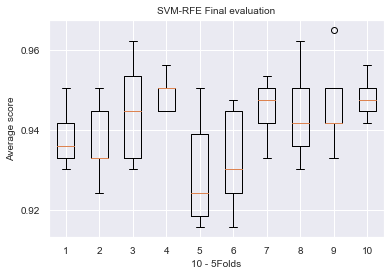

In [90]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

X_t=df[np.unique(dd)].to_numpy()

model = list()
X_t=df[np.unique(dd)].to_numpy()

for x in range(1,11):

    acc_score = []

    X_t=df[np.unique(dd)].to_numpy()

    clf = make_pipeline(StandardScaler(), SVC(kernel="linear", C = 0.1,decision_function_shape='ovo', class_weight = None))
    cv = ShuffleSplit(n_splits=5, test_size=0.3)
    model.append(cross_val_score(clf, X_t, y, cv=cv).tolist())
    #print("Average score:", np.mean(acc_score))
    #model.append(acc_score)             

print("Model:", model)
print("Model average :", np.mean(model))
plt.boxplot(model)
plt.title('SVM-RFE Final evaluation',fontsize=10)
plt.xlabel('10 - 5Folds',fontsize=10)
plt.ylabel('Average score',fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.savefig("SVC-RFE-47-features-ovo-21-5newnew.png",dpi=500)
plt.show()

Accuracy on test set: 
0.9563318777292577
[[ 37   0   0   0   0]
 [  0  14   0   1   0]
 [  0   0 104   2   1]
 [  0   0   2  38   0]
 [  1   0   3   0  26]]
              precision    recall  f1-score   support

       Basal       0.97      1.00      0.99        37
        Her2       1.00      0.93      0.97        15
        LumA       0.95      0.97      0.96       107
        LumB       0.93      0.95      0.94        40
      Normal       0.96      0.87      0.91        30

    accuracy                           0.96       229
   macro avg       0.96      0.94      0.95       229
weighted avg       0.96      0.96      0.96       229

Accuracy on test set: 
0.9432314410480349
[[36  0  0  0  0]
 [ 0 16  0  0  0]
 [ 0  1 98  6  1]
 [ 0  0  4 37  0]
 [ 0  1  0  0 29]]
              precision    recall  f1-score   support

       Basal       1.00      1.00      1.00        36
        Her2       0.89      1.00      0.94        16
        LumA       0.96      0.92      0.94       106
   

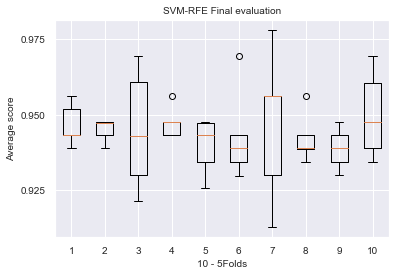

In [65]:
model = list()
X_t=df[np.unique(dd)].to_numpy()
for x in range(1,11):
    folds = 5
    skf = StratifiedKFold(n_splits=folds, random_state=randint(1, 1000), shuffle=True, )
    skf.get_n_splits(X_t, y)
    acc_score = []
    for train_index, test_index in skf.split(X_t, y):
        X_train, X_test = X_t[train_index], X_t[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        scale = StandardScaler()
        scaler = scale.fit(X_train)
        
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)

        clf=SVC(kernel="linear", C = 0.1,decision_function_shape='ovo', class_weight = None,random_state=1)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        
        print('Accuracy on test set: ')
        print(accuracy_score(y_test, y_pred))
        print(confusion_matrix(y_test,y_pred))
        print(classification_report(y_test,y_pred))
        
        acc_score.append(accuracy_score(y_test, y_pred))
    model.append(acc_score)
    print("Average score:", np.mean(acc_score))
    #model.append(acc_score)             

print("Model:", model)
plt.boxplot(model)
plt.title('SVM-RFE Final evaluation',fontsize=10)
plt.xlabel('10 - 5Folds',fontsize=10)
plt.ylabel('Average score',fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.savefig("SVC-RFE-47-features-ovo-21-5new.png",dpi=500)
plt.show()

In [66]:
import numpy as np
np.mean([[0.9563318777292577, 0.9432314410480349, 0.9388646288209607, 0.9432314410480349, 0.9517543859649122], [0.9388646288209607, 0.9475982532751092, 0.9432314410480349, 0.9475982532751092, 0.9473684210526315], [0.9694323144104804, 0.9301310043668122, 0.9213973799126638, 0.9606986899563319, 0.9429824561403509], [0.9475982532751092, 0.9432314410480349, 0.9475982532751092, 0.9432314410480349, 0.956140350877193], [0.9432314410480349, 0.9344978165938864, 0.9475982532751092, 0.925764192139738, 0.9473684210526315], [0.9694323144104804, 0.9344978165938864, 0.9388646288209607, 0.9432314410480349, 0.9298245614035088], [0.9301310043668122, 0.9781659388646288, 0.9563318777292577, 0.9126637554585153, 0.956140350877193], [0.9432314410480349, 0.9344978165938864, 0.9563318777292577, 0.9388646288209607, 0.9385964912280702], [0.9475982532751092, 0.9301310043668122, 0.9388646288209607, 0.9432314410480349, 0.9342105263157895], [0.9475982532751092, 0.9344978165938864, 0.9388646288209607, 0.9694323144104804, 0.9605263157894737]])

0.9444947521642534

Model: [[0.9505813953488372, 0.9447674418604651, 0.9244186046511628, 0.9476744186046512, 0.9244186046511628], [0.938953488372093, 0.9447674418604651, 0.9331395348837209, 0.9331395348837209, 0.938953488372093], [0.938953488372093, 0.936046511627907, 0.9476744186046512, 0.9302325581395349, 0.9593023255813954], [0.9418604651162791, 0.9447674418604651, 0.9302325581395349, 0.9418604651162791, 0.9593023255813954], [0.9273255813953488, 0.9447674418604651, 0.9534883720930233, 0.9534883720930233, 0.936046511627907], [0.9593023255813954, 0.9476744186046512, 0.9505813953488372, 0.936046511627907, 0.938953488372093], [0.9186046511627907, 0.9505813953488372, 0.9622093023255814, 0.938953488372093, 0.9418604651162791], [0.9418604651162791, 0.9505813953488372, 0.9534883720930233, 0.9447674418604651, 0.9302325581395349], [0.9418604651162791, 0.9563953488372093, 0.936046511627907, 0.9505813953488372, 0.9331395348837209], [0.9215116279069767, 0.9476744186046512, 0.9302325581395349, 0.9418604651162791, 0.

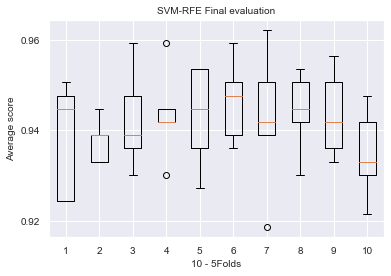

In [68]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

X_t=df[np.unique(dd)].to_numpy()

model = list()
X_t=df[np.unique(dd)].to_numpy()

for x in range(1,11):

    acc_score = []

    X_t=df[np.unique(dd)].to_numpy()

    clf = make_pipeline(StandardScaler(), SVC(kernel="linear", C = 0.1,decision_function_shape='ovo', class_weight = None))
    cv = ShuffleSplit(n_splits=5, test_size=0.3)
    model.append(cross_val_score(clf, X_t, y, cv=cv).tolist())
    #print("Average score:", np.mean(acc_score))
    #model.append(acc_score)             

print("Model:", model)
print("Model average :", np.mean(model))
plt.boxplot(model)
plt.title('SVM-RFE Final evaluation',fontsize=10)
plt.xlabel('10 - 5Folds',fontsize=10)
plt.ylabel('Average score',fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.savefig("SVC-RFE-47-features-ovo-21-5newnew.png",dpi=500)
plt.show()

In [76]:
np.unique(dd).tolist()

['ABCC2',
 'AGR3',
 'C11orf90',
 'C19orf77',
 'C6orf97',
 'CCDC6',
 'CCNB1',
 'CHRAC1',
 'CITED4',
 'CKS1B',
 'CLEC4F',
 'EFNA2',
 'ERBB2',
 'ESR1',
 'FADS1',
 'FGD1',
 'FGD3',
 'FGFBP1',
 'FOXC1',
 'GLB1',
 'GPR160',
 'KRT20',
 'LAMC3',
 'LCN1',
 'LCT',
 'LOC145837',
 'MAG',
 'MAPT',
 'MBOAT1',
 'MIA',
 'NPFFR1',
 'NUDT9P1',
 'OLAH',
 'PHYHD1',
 'PIF1',
 'PPP4R4',
 'RETN',
 'RNASE3',
 'SLC6A11',
 'SLC6A2',
 'SMC4',
 'SPAG5',
 'SPOCK3',
 'TAC1',
 'TACC2',
 'TCAM1P',
 'TCEAL7',
 'TCF19',
 'TMEM194B',
 'WDR67']

In [25]:
np.mean([[0.9447674418604651, 0.936046511627907, 0.9418604651162791, 0.9447674418604651, 0.9273255813953488], [0.938953488372093, 0.9186046511627907, 0.9534883720930233, 0.9418604651162791, 0.936046511627907], [0.936046511627907, 0.9593023255813954, 0.9273255813953488, 0.9331395348837209, 0.9447674418604651], [0.9331395348837209, 0.9505813953488372, 0.9418604651162791, 0.9215116279069767, 0.9534883720930233], [0.9476744186046512, 0.938953488372093, 0.9244186046511628, 0.9476744186046512, 0.9418604651162791], [0.938953488372093, 0.9476744186046512, 0.9563953488372093, 0.9563953488372093, 0.938953488372093], [0.9418604651162791, 0.9505813953488372, 0.9476744186046512, 0.9418604651162791, 0.9418604651162791], [0.9418604651162791, 0.9476744186046512, 0.9476744186046512, 0.936046511627907, 0.9244186046511628], [0.9418604651162791, 0.9418604651162791, 0.9418604651162791, 0.9215116279069767, 0.9302325581395349], [0.9302325581395349, 0.9447674418604651, 0.9505813953488372, 0.9476744186046512, 0.9505813953488372]])

0.9409302325581395

47

In [27]:
len(['UBE2T', 'BIRC5', 'NUF2', 'CDC6', 'CCNB1', 'TYMS', 'MYBL2', 'CEP55',
       'MELK', 'NDC80', 'RRM2', 'UBE2C', 'CENPF', 'PTTG1', 'EXO1', 'ORC6L',
       'ANLN', 'CCNE1', 'CDC20', 'MKI67', 'KIF2C', 'ACTR3B', 'MYC', 'EGFR',
       'KRT5', 'PHGDH', 'CDH3', 'MIA', 'KRT17', 'FOXC1', 'SFRP1', 'KRT14',
       'ESR1', 'SLC39A6', 'BAG1', 'MAPT', 'PGR', 'CXXC5', 'MLPH', 'BCL2',
       'MDM2', 'NAT1', 'FOXA1', 'BLVRA', 'MMP11', 'GPR160', 'FGFR4', 'GRB7',
       'TMEM45B', 'ERBB2'])

50

In [63]:
len(np.unique(dd))

50

In [34]:
len(features[0].columns)

50

In [58]:
len(np.unique(allFinalF))

3

In [59]:
len(np.unique(more))

18

In [61]:
len(morethan22)

18

In [77]:
np.unique(dd)

array(['ABCC2', 'AGR3', 'C11orf90', 'C19orf77', 'C6orf97', 'CCDC6',
       'CCNB1', 'CHRAC1', 'CITED4', 'CKS1B', 'CLEC4F', 'EFNA2', 'ERBB2',
       'ESR1', 'FADS1', 'FGD1', 'FGD3', 'FGFBP1', 'FOXC1', 'GLB1',
       'GPR160', 'KRT20', 'LAMC3', 'LCN1', 'LCT', 'LOC145837', 'MAG',
       'MAPT', 'MBOAT1', 'MIA', 'NPFFR1', 'NUDT9P1', 'OLAH', 'PHYHD1',
       'PIF1', 'PPP4R4', 'RETN', 'RNASE3', 'SLC6A11', 'SLC6A2', 'SMC4',
       'SPAG5', 'SPOCK3', 'TAC1', 'TACC2', 'TCAM1P', 'TCEAL7', 'TCF19',
       'TMEM194B', 'WDR67'], dtype='<U9')

In [86]:
len(np.unique(dd))

50